### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025
# **Tarea Semanal 4**: *Primeras nociones de estimación espectral*
#### Mora Taranilla y Victoria Jazmín Salgado

## **Resumen**: 
El objetivo de esta tarea semanal fue comenzar a trabajar con conceptos relacionados a la estimación espectral. Se calcularon estimadores de Amplitud y de Frecuencia para una señal senoidal ruidosa, mediante el Software Spyder.

## **Introducción**

#### **SNR**
En esta tarea se introduce la utilización de señales senoidales ruidosas. Aparecen en juego variables aleatorias, que permiten modelar el ruido estocástico, es decir, que tiene un comportamiento probabilístico en lugar de determinístico.
En variables aleatorias, se aplica una función para mapear del espacio muestral hasta un valor de la variable, en este caso, un valor de la señal senoidal.

Dada su fuerte impacto en la calidad de las señales, el ruido es un tema central en el procesamiento. A partir de ello, aparece el concepto de SNR (por sus siglas en inglés, *Signal to Noise Ratio*), que establece una relación entre la potencia de la señal estudiada con respecto a la potencia del ruido. Se define en decibeles de la siguiente manera: 

$$
SNR_{\mathrm{dB}} = 10 \cdot \log_{10} \left( \frac{P_{\text{señal}}}{P_{\text{ruido}}} \right) \tag{1}
$$

Entonces, parametrizando el SNR es posible obtener una señal senoidal más o menos ruidosa. Mayor SNR implica una señal más limpia, y menor SNR, una señal más contaminada, por denotar cuánto mas potente es la señal que el ruido. Un SNR más alto significa que la potencia de la señal *con respecto al ruido* es mayor.

#### **Estimación** 
En el estudio de señales, a menudo se trabaja con señales sin conocer su composición subyacente. Al no ser determinísticas en todos sus parámetros, no siempre es posible determinar con precisión algunos valores característicos. Debido a esto, se introduce el concepto de estimación. Un estimador es, entonces, un algoritmo que permite inferir estos parámetros a partir de las observaciones. Al contar con una cantidad suficiente de muestras o realizaciones, se logra estimar parámetros desconocidos de las señales generadas.

En el caso del estimador de amplitud, se busca estimar la magnitud de la Transformada de Fourier Discreta para una frecuencia de interés específica. Para esa misma frecuencia, esta magnitud será diferente para cada senoidal, gracias a la naturaleza estocástica del *shifter* que la compone. Es por eso que se hacen 200 realizaciones, que representan  200 senoidales diferentes, cada una con una frecuencia base fija pero que diferirá levemente de realización a realización gracias a su componente aleatoria.

Para el estimador de frecuencia, se busca identificar qué bin de la DFT presenta el valor de amplitud más alto. En el caso de las señales constituidas por un solo tono, como las senoidales sintetizadas en este caso, ese bin corresponde a la frecuencia central de la señal, definida por la frecuencia base y el desplazamiento introducido por el shifter.

## **Análisis y Desarrollo**

Se comenzó por la generación de 200 senoidales de 1000 muestras cada una que sigan la siguiente fórmula:

$$
x(k) = a_0 \cdot \sin(\Omega_1 \cdot n) + n_a(n) \tag{1}
$$
siendo 
$$
a_0 = 2 
$$
$$
\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}
$$
$$ 
\Omega_0 = \frac{\pi}{2}
$$

Siendo las variables aleatorias ($f_r$ y $n_a(n)$) definidas por las siguientes distribuciones de probabilidad 
$$
f_r \sim \mathcal{U}(-2, \, 2)
$$
$$
n_a \sim \mathcal{N}(0, \, \sigma ^2)
$$

Una vez generadas las señales, se solicitó el diseño de los siguientes estimadores, de amplitud $a_1$
$$
\hat{a}^i_1 = \lvert X^i_w(\Omega_0) \rvert = \lvert \mathcal{F}\{ x(n) · w_i(n) \} \rvert
$$
Y de frecuencia $\Omega_1$
$$
\hat{\Omega}^i_1 = \mathop{arg\ max}_f \{ \lvert X^i_w(\Omega) \rvert \}
$$

Cada uno de estos estimadores debió calcularse para las mismas 200 senoidales, pero con la aplicación de distintas ventanas. Se comenzó por las solicitadas en la consigna, es decir: Rectangular, Blackman Harris y Flattop. Luego se procedió a repetir el experimento para las ventanas Hamming y Hann, que fueron de elección propia.

A su vez, se realizó el procedimiento para distintos valores de SNR: 3dB y 10dB.

Se pide realizar una tabla por cada SNR, que contenga el sesgo y la varianza de cada estimador para cada ventana analizada. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft
import scipy.signal as sp
import scipy.stats as st

In [2]:
SNR_1 = 10 # SNR en dB
SNR_2 = 3 
amp_0 = 2 # Amplitud Senoidal
N = 1000 # Cantidad de muestras
fs = 1000 # Frecuencia de sampleo [Hz]
df = fs / N # Resolucion espectral [Hz]
R = 200 # Cantidad de realizaciones

Se comenzó por la generación de señales senoidales. Gracias a la componente estocástica $f_r$ (o *shifter*), cada una de las realizaciones tendrá una frecuencia distinta, pero constante a lo largo de sus $N=1000$ muestras.

Para estructurar la simulación, se generó un vector de $R=200$ valores aleatorios (uno para cada realización), a partir del cual se calculó el vector de frecuencias $ \Omega_1$ para cada una de las 200 senoidales deseadas.

Luego se construyó una matriz de $N \times R \space (1000 \times 200)$, donde cada columna representa una realización completa de la señal con su ruido correspondiente. Por otro lado, al recorrer la matriz por filas, se encuentran las 200 muestras que corresponden a un mismo instante de tiempo $n$, pero de diferentes realizaciones. 

Así se obtuvieron 200 señales senoidales con frecuencias levemente diferentes gracias al shifter, cuyos valores $x[n]$ se encuentran recorriendo la matriz columna por columna.

Luego, definiendo el SNR se puede despejar la potencia deseada del ruido para lograrlo, modificando entonces la distribución normal que conforma su función densidad de probabilidad. De esta forma se obtiene que $P_n = \frac{P_s}{10^(\frac{SNR_{dB}}{10})}$. 

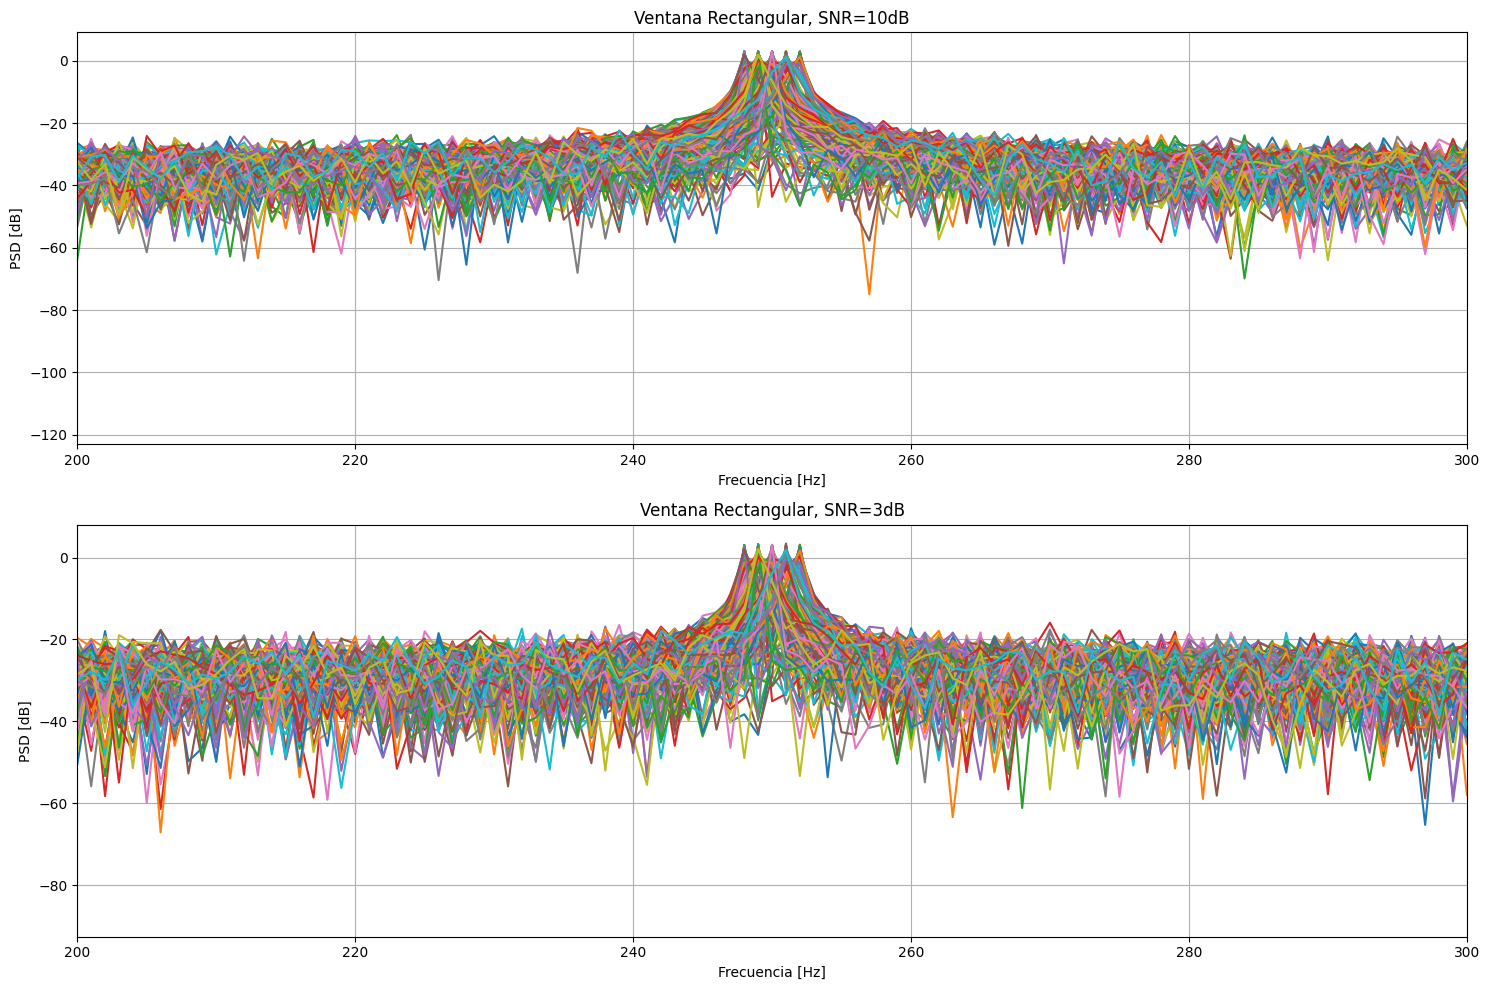

In [3]:
#Aleatoriedad de la frecuencia 
frec_rand = np.random.uniform(-2,2,R) # Genera un vector de longitud 200, con un valor aleatorio entre -2 y 2

tt = np.arange(N) * (1/fs)
tt = tt.reshape((N,1))  # Para cambiar la forma a vertical

# Cálculo de potencia de señal y ruido
P_senoidal = (amp_0**2) / 2          # potencia de la senoidal
P_ruido_deseada_1 = P_senoidal / (10**(SNR_1/10)) # potencia de ruido según SNR
P_ruido_deseada_2 = P_senoidal / (10**(SNR_2/10))
sigma_ruido_1 = np.sqrt(P_ruido_deseada_1)     # desviación estándar del ruido
sigma_ruido_2 = np.sqrt(P_ruido_deseada_2)

# Armado Matrices
t_mat = np.tile(tt, (1,R))
fr_mat = np.tile(frec_rand, (N,1))
ruido_mat_1 = np.random.normal(loc = 0, scale = sigma_ruido_1, size = (N,R)) # media, desvío, tamano
ruido_mat_2 = np.random.normal(loc = 0, scale = sigma_ruido_2, size = (N,R))

# Matriz de Senoidales
s_mat = amp_0 * np.sin(2 * np.pi * (fr_mat + N/4) * df * t_mat)
xx_mat_1 = s_mat + ruido_mat_1 # Genero una senoidal con ruido
xx_mat_2 = s_mat + ruido_mat_2
xx_mat_rect_10dB = xx_mat_1
xx_mat_rect_3dB = xx_mat_2

#Transformo Fourier, normalizada
X_MAT_RECT_10dB = (1/N)*fft(xx_mat_rect_10dB, axis = 0) #Axis= 0 para que lo haga por columna
X_MAT_RECT_3dB = (1/N)*fft(xx_mat_rect_3dB, axis = 0)
bins = np.arange(N) * (fs/(N))

#Ventana Rectangular (Implícita)
plt.figure(1, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot (bins, 10*np.log10(2*(np.abs(X_MAT_RECT_10dB))**2)) 
plt.title('Ventana Rectangular, SNR=10dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.subplot(2,1,2)
plt.plot (bins, 10*np.log10(2*(np.abs(X_MAT_RECT_3dB))**2)) 
plt.title('Ventana Rectangular, SNR=3dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.tight_layout()

plt.show ()

En base a los gráficos, se puede observar cómo afecta el SNR a las señales resultantes. En un principio se puede ver como el piso de ruido se encuentra más elevado en caso de la señal más contaminada (3dB). Este mismo comportamiento se debería observar también en caso de las otras ventanas. 

Los gráficos fueron centrados en 250 Hz, que corresponde a la frecuencia central base de las senoidales, ya que los picos de la Transformada de Fourier Discreta se ubican alrededor de este valor. Por la definición que implementamos de las senoidales, sabemos que las frecuencias varían entre 248Hz y 252Hz, resultado la distribución uniforme del shifter entre -2 y 2. Los gráficos fueron realizados con estos límites para poder observar mejor el comportamiento. 

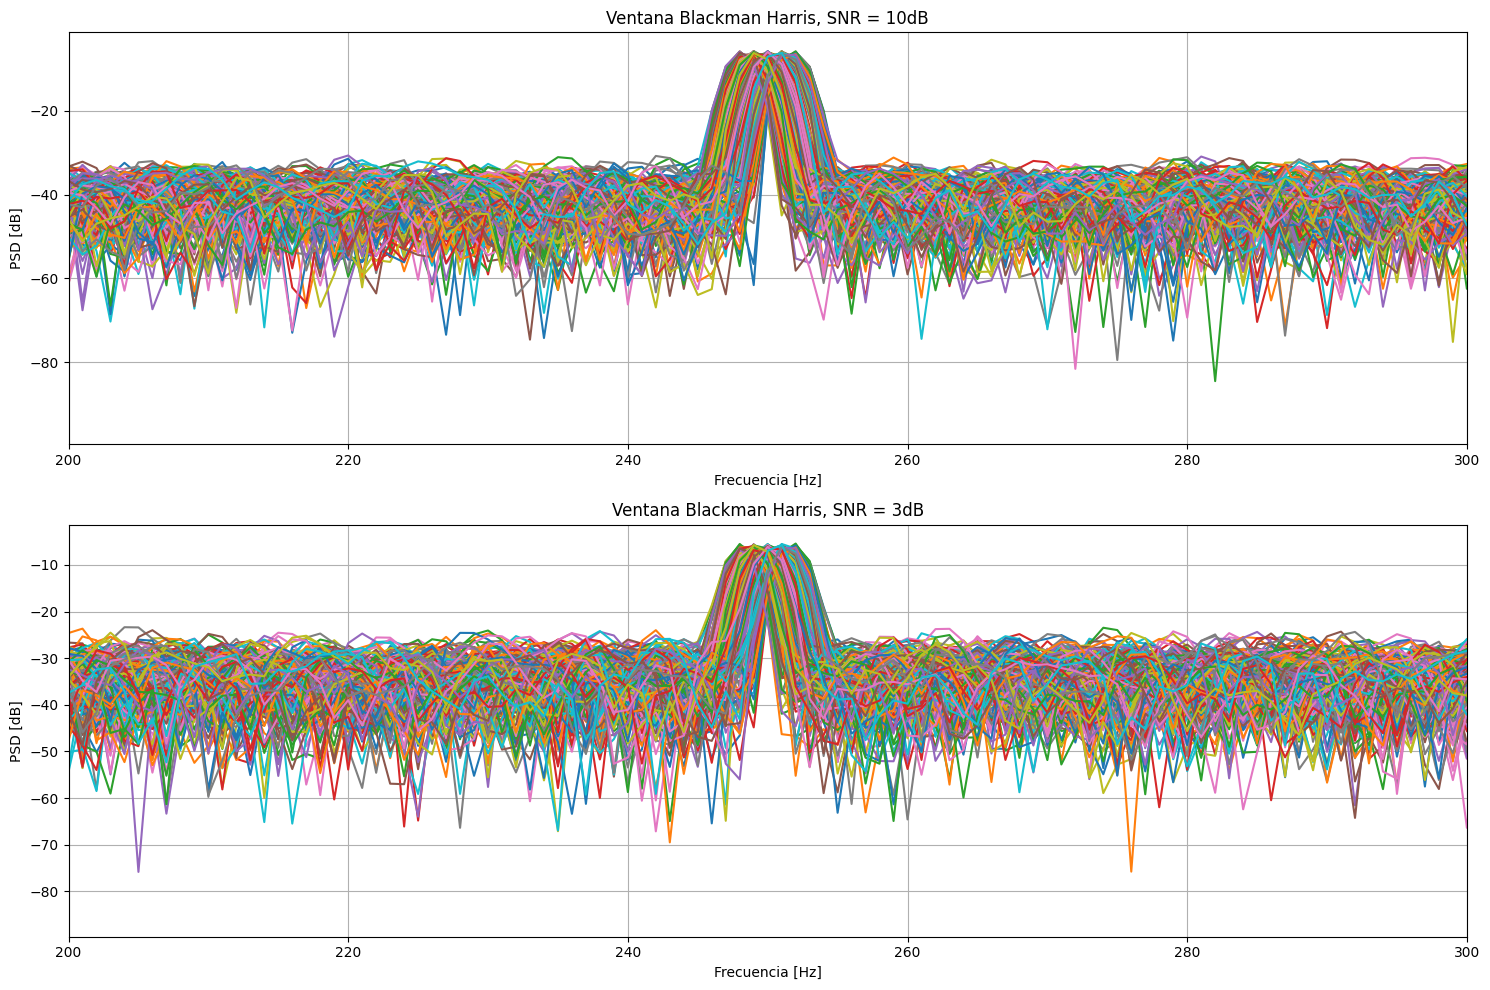

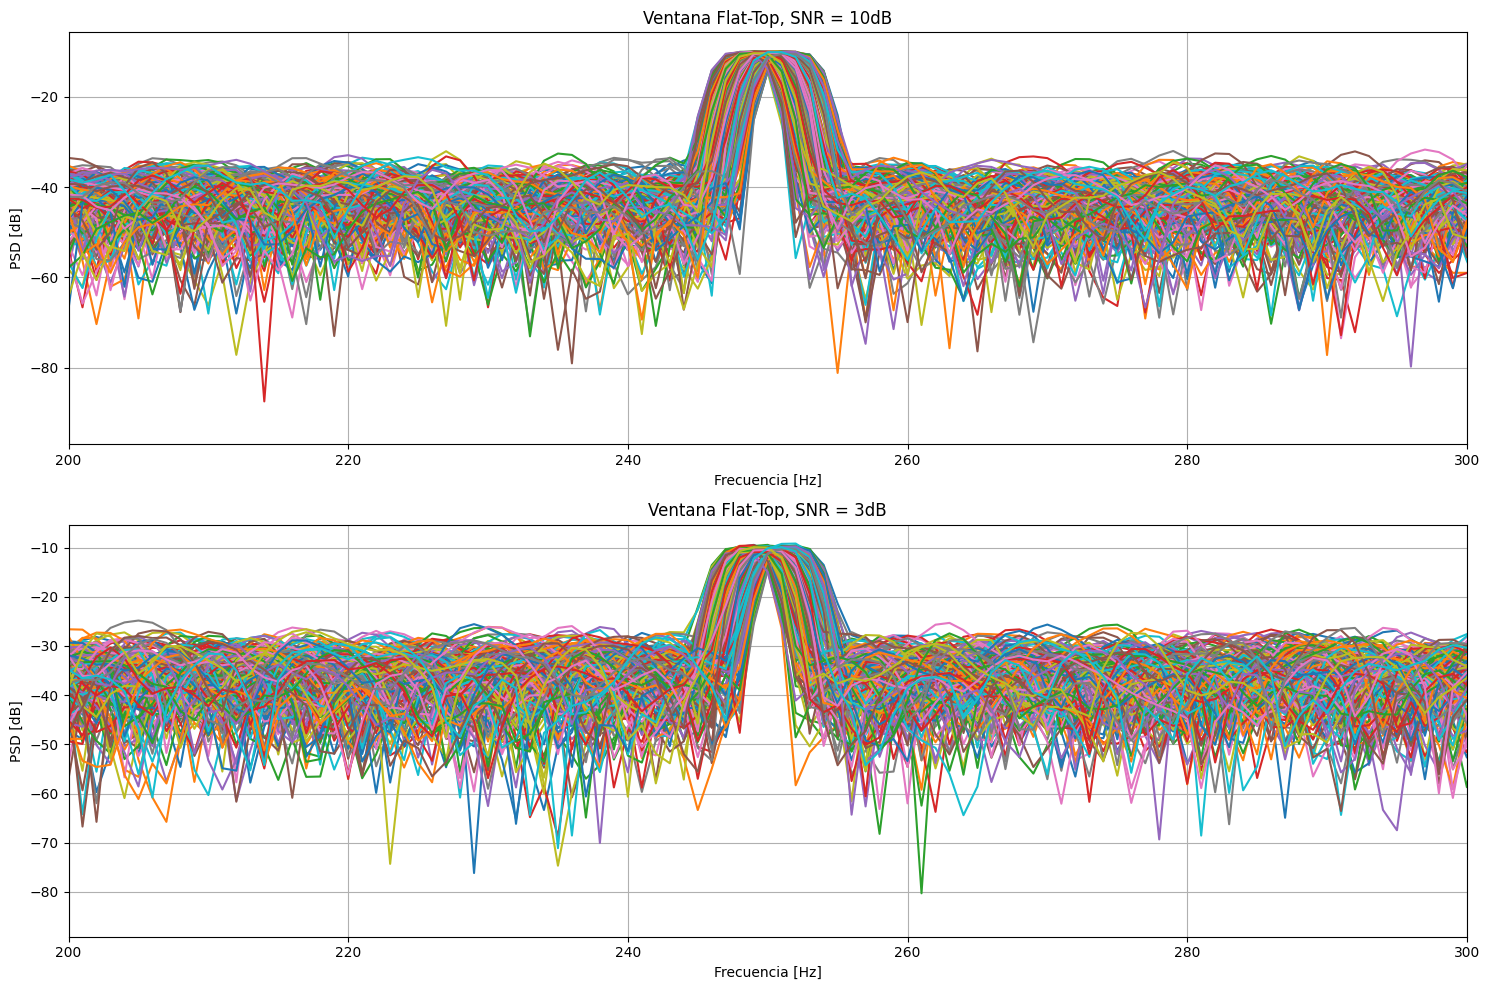

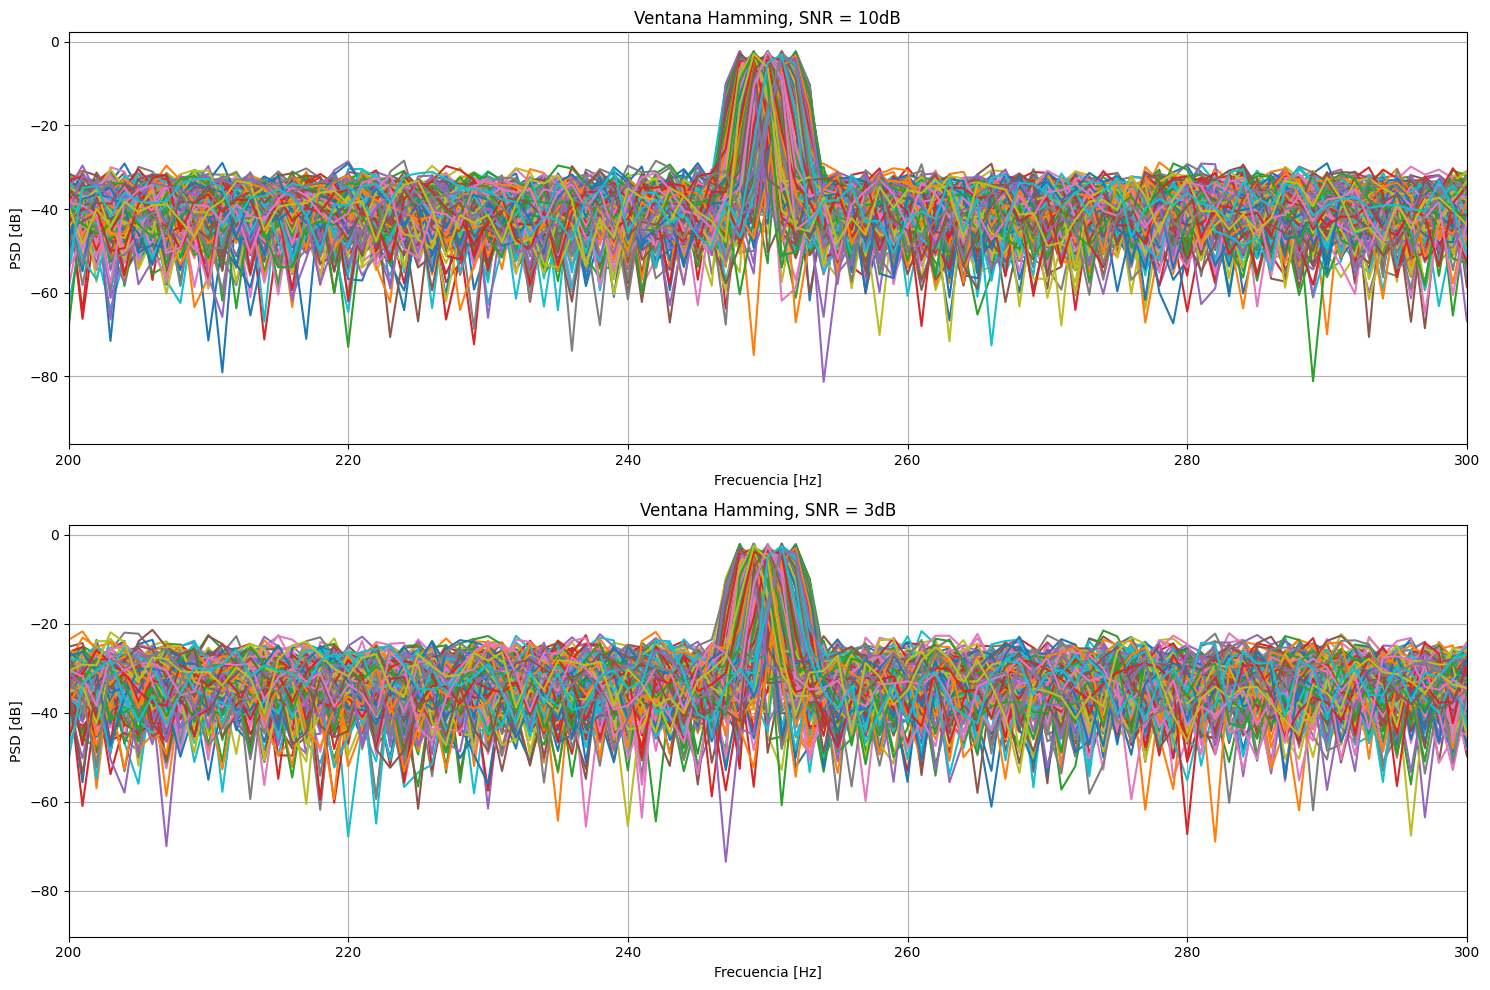

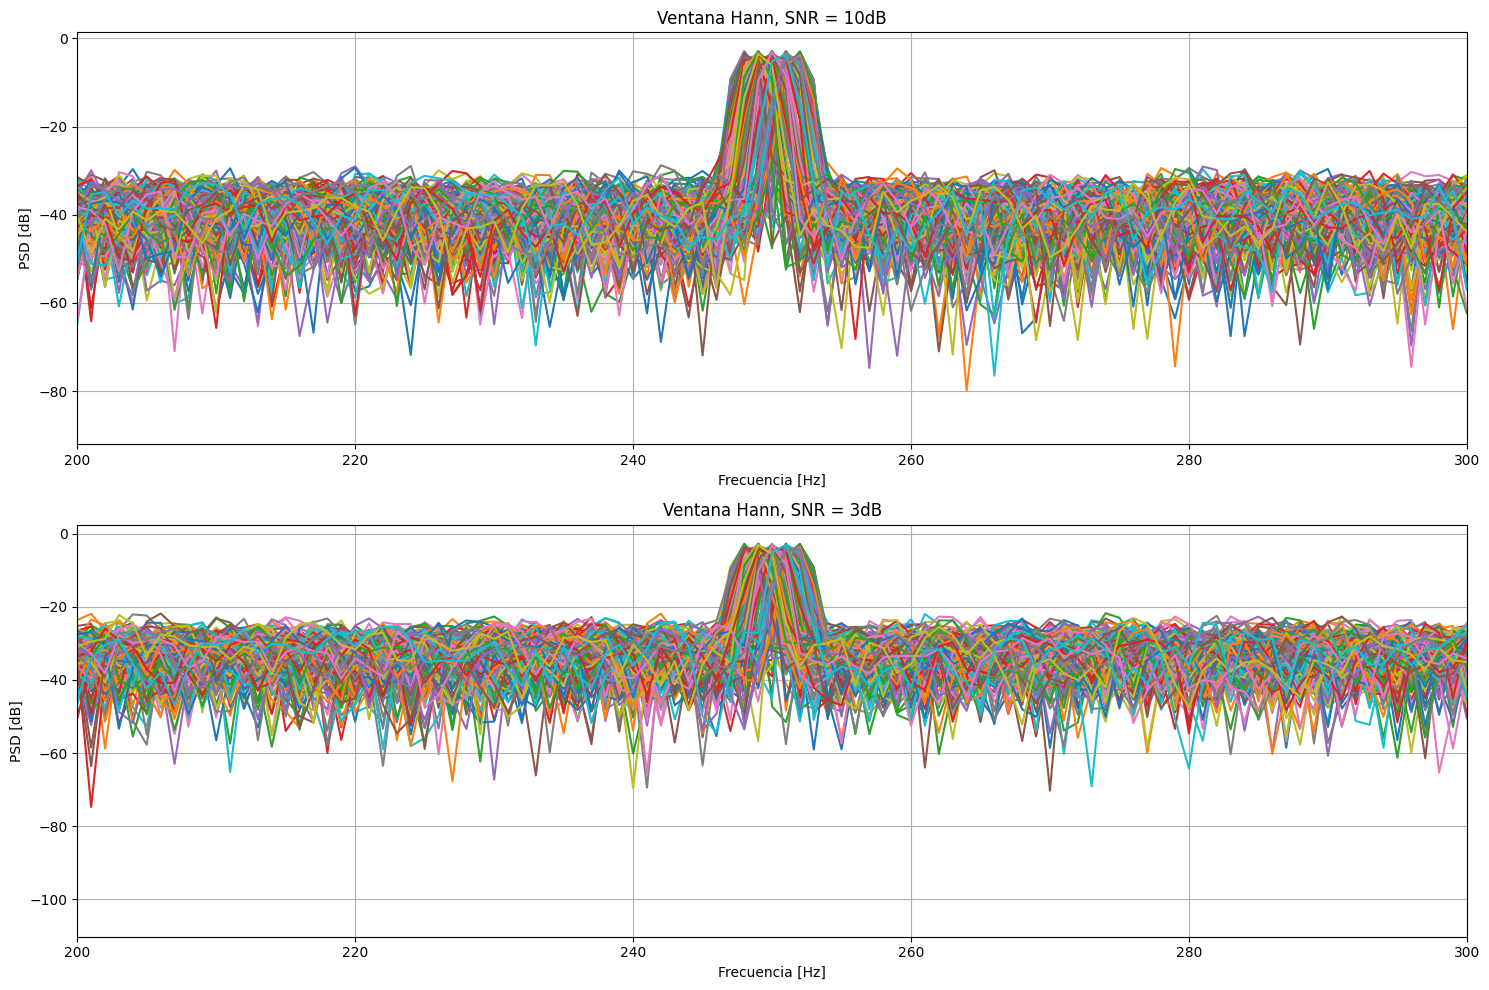

In [4]:
# Aplicamos ventanas y Transformamos - dB

# Blackman
w_blck = sp.get_window("blackmanharris", N) # Genero una ventana de longitud N
w_blck = w_blck.reshape((N,1)) # Cambio su forma a vertical.

#Aplico las ventanas en el tiempo
xx_mat_blck_10dB = xx_mat_1 * w_blck
xx_mat_blck_3dB = xx_mat_2 * w_blck

X_MAT_BLCK_10dB = (1/N)*fft(xx_mat_blck_10dB, axis = 0)
X_MAT_BLCK_3dB = (1/N)*fft(xx_mat_blck_3dB, axis = 0)

plt.figure(2, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot (bins, 10*np.log10(2*np.abs(X_MAT_BLCK_10dB)**2)) 
plt.title('Ventana Blackman Harris, SNR = 10dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.subplot(2,1,2)
plt.plot (bins, 10*np.log10(2*np.abs(X_MAT_BLCK_3dB)**2)) 
plt.title('Ventana Blackman Harris, SNR = 3dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.tight_layout()

plt.show ()

# Flat-top
w_flat = sp.get_window("flattop", N)
w_flat = w_flat.reshape((N,1))

xx_mat_flat_10dB = xx_mat_1 * w_flat
xx_mat_flat_3dB = xx_mat_2 * w_flat

X_MAT_FLAT_10dB = (1/N)*fft(xx_mat_flat_10dB, axis = 0)
X_MAT_FLAT_3dB = (1/N)*fft(xx_mat_flat_3dB, axis = 0)

plt.figure(3, figsize = (15,10))

plt.subplot(2,1,1)
plt.plot (bins, 10*np.log10(2*np.abs(X_MAT_FLAT_10dB)**2)) 
plt.title('Ventana Flat-Top, SNR = 10dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.subplot(2,1,2)
plt.plot (bins, 10*np.log10(2*np.abs(X_MAT_FLAT_3dB)**2))
plt.title('Ventana Flat-Top, SNR = 3dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.tight_layout()

plt.show ()

#Hamming
w_hamming = sp.get_window("hamming", N)
w_hamming = w_hamming.reshape((N,1))

xx_mat_hamming_10dB = xx_mat_1 * w_hamming
xx_mat_hamming_3dB = xx_mat_2 * w_hamming

X_MAT_HAMMING_10dB = (1/N)*fft(xx_mat_hamming_10dB, axis = 0)
X_MAT_HAMMING_3dB = (1/N)*fft(xx_mat_hamming_3dB, axis = 0)

plt.figure(4, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot (bins, 10*np.log10(2*np.abs(X_MAT_HAMMING_10dB)**2))
plt.title('Ventana Hamming, SNR = 10dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.subplot(2,1,2)
plt.plot (bins, 10*np.log10(2*np.abs(X_MAT_HAMMING_3dB)**2))
plt.title('Ventana Hamming, SNR = 3dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.tight_layout()

plt.show ()

#Hann
w_hann = sp.get_window("hann", N)
w_hann = w_hann.reshape((N,1))

xx_mat_hann_10dB = xx_mat_1 * w_hann
xx_mat_hann_3dB = xx_mat_2 * w_hann

X_MAT_HANN_10dB = (1/N)*fft(xx_mat_hann_10dB, axis = 0)
X_MAT_HANN_3dB = (1/N)*fft(xx_mat_hann_3dB, axis = 0)

plt.figure(5, figsize = (15,10))

plt.subplot(2,1,1)
plt.plot (bins, 10*np.log10(2*np.abs(X_MAT_HANN_10dB)**2))
plt.title('Ventana Hann, SNR = 10dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.subplot(2,1,2)
plt.plot (bins, 10*np.log10(2*np.abs(X_MAT_HANN_3dB)**2))
plt.title('Ventana Hann, SNR = 3dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))

plt.tight_layout()

plt.show ()

Tal como era esperado, los pisos de ruido de todas las señales con 10 dB de SNR se encuentran por debajo de los obtenidos con 3 dB de SNR. Esto se debe a que la diferencia entre la media del piso de ruido y el pico de la delta está directamente relacionada con el SNR. Si bien esta relación también depende del ancho de banda de las señales, en este caso, al mantener el mismo ancho de banda, la diferencia observada se explica únicamente por el valor del SNR. Además, se ven diferencias en el ancho del lóbulo central de cada espectro, lo que es esperable gracias al uso de diferentes ventanas que difieren en esta característica.

Una vez obtenidas todas las señales, es decir las 200 realizaciones de senoidales para cada ventana con ambos SNR, se pasa a realizar los estimadores para cada una de las matrices de senoidales.

### Estimador de Amplitud
Para el estimador $\hat{a}^i_1$, se evalúa la magnitud del espectro a frecuencia 250Hz ($\frac{N}{4} \cdot \Delta f$) , tomando los valores de la matriz de DFT correspondientes a esa frecuencia y pasándolos a un vector. Es de esperarse que en estos valores de frecuencia se encuentren valores altos de amplitud en el espectro, debido a la frecuencia $\Omega_0$. Sin embargo, gracias a la $f_r$, no todas las senoidales tendrán igual amplitud en ese punto. Se pasan los valores de la matriz de la DFT a dB y se grafican los histogramas. 
Éstos reflejarán, para una misma frecuencia, cuántas veces aparecen diferentes valores de amplitud. 

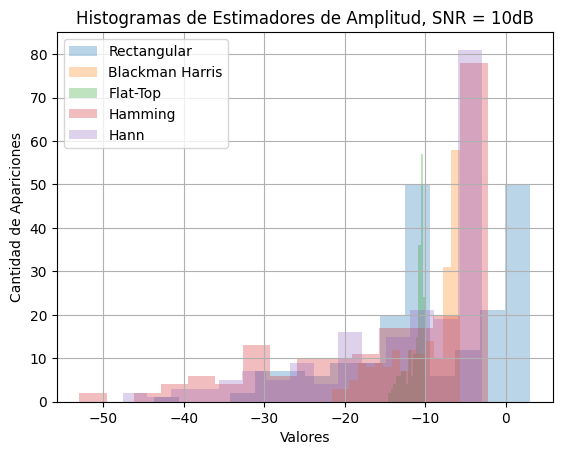

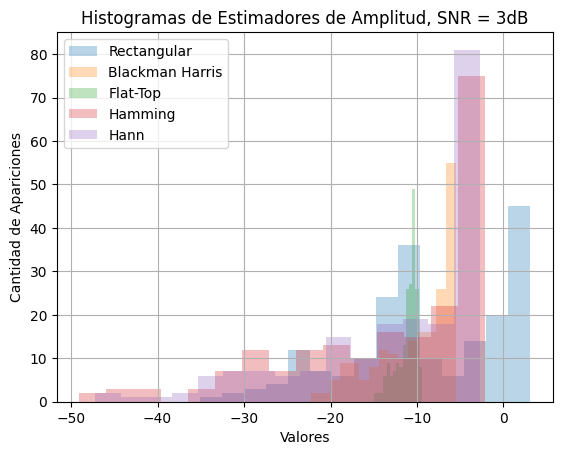

In [5]:
# 10dB
aa_rect_10dB = 10*np.log10((2*np.abs(X_MAT_RECT_10dB[N//4,:])**2)) 
aa_blck_10dB = 10*np.log10((2*np.abs(X_MAT_BLCK_10dB[N//4,:])**2))
aa_flat_10dB = 10*np.log10((2*np.abs(X_MAT_FLAT_10dB[N//4,:])**2))
aa_hamming_10dB = 10*np.log10((2*np.abs(X_MAT_HAMMING_10dB[N//4,:])**2))
aa_hann_10dB = 10*np.log10((2*np.abs(X_MAT_HANN_10dB[N//4,:])**2))

# 3dB
aa_rect_3dB = 10*np.log10((2*np.abs(X_MAT_RECT_3dB[N//4,:])**2)) 
aa_blck_3dB = 10*np.log10((2*np.abs(X_MAT_BLCK_3dB[N//4,:])**2))
aa_flat_3dB = 10*np.log10((2*np.abs(X_MAT_FLAT_3dB[N//4,:])**2))
aa_hamming_3dB = 10*np.log10((2*np.abs(X_MAT_HAMMING_3dB[N//4,:])**2))
aa_hann_3dB = 10*np.log10((2*np.abs(X_MAT_HANN_3dB[N//4,:])**2))


## Grafico histogramas 
transp = 0.3 ## Elegimos una transparencia para poder observar todos los histogramas juntos
bins_est = 15 ## Define la cantidad de columnas que tiene el histograma

plt.figure(6)
plt.hist(aa_rect_10dB, bins = bins_est, alpha = transp, label='Rectangular') 
plt.hist(aa_blck_10dB, bins = bins_est, alpha = transp, label='Blackman Harris')
plt.hist(aa_flat_10dB, bins = bins_est, alpha = transp, label='Flat-Top')
plt.hist(aa_hamming_10dB, bins = bins_est, alpha = transp, label='Hamming')
plt.hist(aa_hann_10dB, bins = bins_est, alpha = transp, label = 'Hann')
plt.title('Histogramas de Estimadores de Amplitud, SNR = 10dB')
plt.grid(True)
plt.xlabel('Valores')
plt.ylabel('Cantidad de Apariciones')
plt.legend()
plt.show()

plt.figure(7)
plt.hist(aa_rect_3dB, bins = bins_est, alpha = transp, label='Rectangular') 
plt.hist(aa_blck_3dB, bins = bins_est, alpha = transp, label='Blackman Harris')
plt.hist(aa_flat_3dB, bins = bins_est, alpha = transp, label='Flat-Top')
plt.hist(aa_hamming_3dB, bins = bins_est, alpha = transp, label='Hamming')
plt.hist(aa_hann_3dB, bins = bins_est, alpha = transp, label = 'Hann')
plt.title('Histogramas de Estimadores de Amplitud, SNR = 3dB')
plt.grid(True)
plt.xlabel('Valores')
plt.ylabel('Cantidad de Apariciones')
plt.legend()
plt.show()

Como se explicó anteriormente, en los histogramas se pueden visualizar los distintos valores encontrados para la amplitud *de la DFT* a frecuencia *250 Hz*. Permite de manera sencilla visualizar la media y la varianza de los estimadores. A simple vista, se puede observar que la ventana *Flat-top* es la que menos varianza presenta, y esto es debido al tamaño de su lóbulo principal. Al tener el lóbulo principal más ancho, las frecuencias cercanas a 250 Hz se atenúan menos que en las otras ventanas, concentrando así los valores de amplitud. Por otro lado, las ventanas de *Hann, Hamming y rectangular* presentan una mayor varianza en comparación. 

También es simple notar que de manera general, que la mayor parte de valores encontrados se acercan a cero. Las distribuciones no siguen un patrón normal, ni ninuguna distribución específica.

Para calcular el sesgo y la varianza de estos estimadores, se utilizó la función *median* de NumPy. Ésta calcula el valor que deja el $50\%$ de las muestras totales a cada lado. De esta forma, se obtiene un valor esperado que se asemeje más a la realidad que el promedio de las distintas amplitudes halladas.

In [6]:
#CÁLCULO MEDIANA

## 10 dB
mediana_flat_10dB = np.median(aa_flat_10dB)
mediana_blck_10dB = np.median(aa_blck_10dB)
mediana_rect_10dB = np.median(aa_rect_10dB)
mediana_hamming_10dB = np.median(aa_hamming_10dB)
mediana_hann_10dB = np.median(aa_hann_10dB)

## 3 dB
mediana_flat_3dB = np.median(aa_flat_3dB)
mediana_blck_3dB = np.median(aa_blck_3dB)
mediana_rect_3dB = np.median(aa_rect_3dB)
mediana_hamming_3dB = np.median(aa_hamming_3dB)
mediana_hann_3dB = np.median(aa_hann_3dB)

Una vez encontrado el valor esperado, se puede calibrar el histograma, ubicando la mediana en cero. De esta forma, se puede visualizar mejor cómo se dividen las muestras a cada lado y la varianza del estimador de cada ventana.

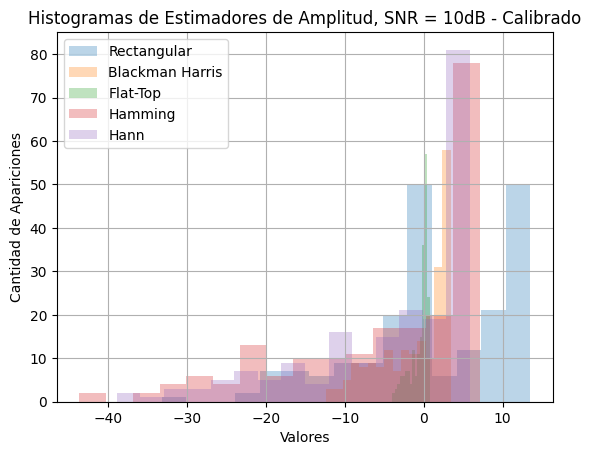

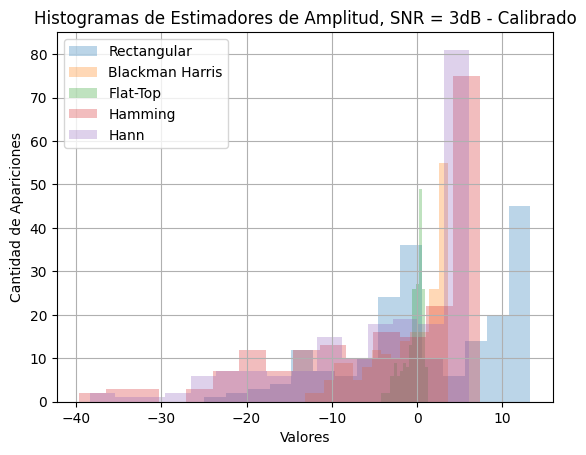

In [7]:
#CALIBRACIÓN

plt.figure(8)
plt.hist(aa_rect_10dB - mediana_rect_10dB, bins = 15, alpha = transp, label='Rectangular') 
plt.hist(aa_blck_10dB - mediana_blck_10dB, bins = 15, alpha = transp, label='Blackman Harris')
plt.hist(aa_flat_10dB - mediana_flat_10dB, bins = 15, alpha = transp, label='Flat-Top')
plt.hist(aa_hamming_10dB - mediana_hamming_10dB, bins = 15, alpha = transp, label='Hamming')
plt.hist(aa_hann_10dB - mediana_hann_10dB, bins = 15, alpha = transp, label='Hann')
plt.title('Histogramas de Estimadores de Amplitud, SNR = 10dB - Calibrado')
plt.grid(True)
plt.xlabel('Valores')
plt.ylabel('Cantidad de Apariciones')
plt.legend()
plt.show()

plt.figure(9)
plt.hist(aa_rect_3dB - mediana_rect_3dB, bins = 15, alpha = transp, label='Rectangular') 
plt.hist(aa_blck_3dB - mediana_blck_3dB, bins = 15, alpha = transp, label='Blackman Harris')
plt.hist(aa_flat_3dB - mediana_flat_3dB, bins = 15, alpha = transp, label='Flat-Top')
plt.hist(aa_hamming_3dB - mediana_hamming_3dB, bins = 15, alpha = transp, label='Hamming')
plt.hist(aa_hann_3dB - mediana_hann_3dB, bins = 15, alpha = transp, label='Hann')
plt.title('Histogramas de Estimadores de Amplitud, SNR = 3dB - Calibrado')
plt.grid(True)
plt.xlabel('Valores')
plt.ylabel('Cantidad de Apariciones')
plt.legend()
plt.show()

Ahora, se realiza el cálculo del sesgo y la varianza de los estimadores. Para calcular el sesgo se utiliza la siguiente fórmula:

$$
s_{a_i} = E\{a_i\} - a_0
$$

siendo en este caso $a_i$ el estimador, $E\{a_i\}$ el valor esperado del mismo y $a_0$ la amplitud real con la que fueron generadas las señales senoidales.

Para evaluar la dispersión de los resultados de manera robusta frente a valores atípicos, se utiliza la función *median_abs_deviation* de *scipy.stats*, que mide qué tan alejados están los valores respecto a la mediana calculada anteriormente.

In [8]:
## Sesgo de los estimadores de amplitud
amp_0_dB = 20 * np.log10(np.sqrt(2)) # Valor real de la amplitud en dB

# 10dB
sesgo_amp_rect_10dB = mediana_rect_10dB - amp_0_dB
sesgo_amp_blck_10dB = mediana_blck_10dB - amp_0_dB
sesgo_amp_flat_10dB = mediana_flat_10dB - amp_0_dB
sesgo_amp_hamming_10dB = mediana_hamming_10dB - amp_0_dB
sesgo_amp_hann_10dB = mediana_hann_10dB - amp_0_dB

# 3dB
sesgo_amp_rect_3dB = mediana_rect_3dB - amp_0_dB
sesgo_amp_blck_3dB = mediana_blck_3dB - amp_0_dB
sesgo_amp_flat_3dB = mediana_flat_3dB - amp_0_dB
sesgo_amp_hamming_3dB = mediana_hamming_3dB - amp_0_dB
sesgo_amp_hann_3dB = mediana_hann_3dB - amp_0_dB

## Varianza de los estimadores de amplitud
# 10dB
var_amp_rect_10dB = st.median_abs_deviation(aa_rect_10dB, center = np.median)
var_amp_blck_10dB = st.median_abs_deviation(aa_blck_10dB, center = np.median)
var_amp_hamming_10dB = st.median_abs_deviation(aa_hamming_10dB, center = np.median)
var_amp_flat_10dB = st.median_abs_deviation(aa_flat_10dB, center = np.median)
var_amp_hann_10dB = st.median_abs_deviation(aa_hann_10dB, center = np.median)

# 3dB
var_amp_rect_3dB = st.median_abs_deviation(aa_rect_3dB, center = np.median)
var_amp_blck_3dB = st.median_abs_deviation(aa_blck_3dB, center = np.median)
var_amp_hamming_3dB = st.median_abs_deviation(aa_hamming_3dB, center = np.median)
var_amp_flat_3dB = st.median_abs_deviation(aa_flat_3dB, center = np.median)
var_amp_hann_3dB = st.median_abs_deviation(aa_hann_3dB, center = np.median)

In [9]:
import pandas as pd

estimadores = ["Rectangular", "Blackman", "Flat top", "Hamming", "Hann"]

sesgos_10dB = [sesgo_amp_rect_10dB, sesgo_amp_blck_10dB, sesgo_amp_flat_10dB, sesgo_amp_hamming_10dB, sesgo_amp_hann_10dB]
variancias_10dB = [var_amp_rect_10dB, var_amp_blck_10dB, var_amp_flat_10dB, var_amp_hamming_10dB, var_amp_hann_10dB]

sesgos_3dB = [sesgo_amp_rect_3dB, sesgo_amp_blck_3dB, sesgo_amp_flat_3dB, sesgo_amp_hamming_3dB, sesgo_amp_hann_3dB]
variancias_3dB = [var_amp_rect_3dB, var_amp_blck_3dB, var_amp_flat_3dB, var_amp_hamming_3dB, var_amp_hann_3dB]

df_10dB = pd.DataFrame({
    "Estimador": estimadores,
    "Sesgo de amplitud": sesgos_10dB,
    "Varianza de amplitud": variancias_10dB
})
df_10dB_styled = df_10dB.style.set_caption("Sesgo y Varianza - Estimadores de Amplitud (SNR = 10dB)").hide(axis="index")

df_3dB = pd.DataFrame({
    "Estimador": estimadores,
    "Sesgo de amplitud": sesgos_3dB,
    "Varianza de amplitud": variancias_3dB
})

df_3dB_styled = df_3dB.style.set_caption("Sesgo y Varianza - Estimadores de Amplitud (SNR = 3dB)").hide(axis="index")

df_10dB_styled

In [10]:
df_3dB_styled

Se puede observar que los resultados son similares para los diferentes SNR. En cuanto al sesgo, los valores se asemejan entre los dos SNR, presentando una diferencia de no más de $0.25 dB$ entre los resultados. Asimismo, no son tan diferentes entre sí para cada ventana.

En cuanto a la varianza, se ven reflejadas las observaciones realizadas anteriormente en cuanto a la atenuación de las diferentes ventanas. En caso de la ventana Flat-Top, la varianza es notablemente menor para ambos SNR, gracias a la menor atenuación para frecuencias cercanas a 250Hz. Nuevamente, los valores no cambian abruptamente entre los resultados para los distintos SNR. 

### Estimador de Frecuencia

Continuamos con el cálculo de los estimadores de frecuencia. Para esto, se consideran los valores de la señal hasta N/2, es decir, hasta la frecuencia de Nyquist, evitando así que se incluyan los valores de la delta reflejada. Se esperan estimaciones de frecuencia en el rango de 248 a 252 Hz, debido al desplazamiento aleatorio definido por $f_r$.

In [11]:
#Estimadores de frecuencia

#10 dB
f_blck_10dB = np.argmax(np.abs(X_MAT_BLCK_10dB)[:N//2, :], axis=0)
f_flat_10dB = np.argmax(np.abs(X_MAT_FLAT_10dB)[:N//2, :], axis=0)
f_rect_10dB = np.argmax(np.abs(X_MAT_RECT_10dB)[:N//2, :], axis=0)
f_hamming_10dB = np.argmax(np.abs(X_MAT_HAMMING_10dB)[:N//2, :], axis=0)
f_hann_10dB = np.argmax(np.abs(X_MAT_HANN_10dB)[:N//2, :], axis=0)

#3 dB
f_blck_3dB = np.argmax(np.abs(X_MAT_BLCK_3dB)[:N//2, :], axis=0)
f_flat_3dB = np.argmax(np.abs(X_MAT_FLAT_3dB)[:N//2, :], axis=0)
f_rect_3dB = np.argmax(np.abs(X_MAT_RECT_3dB)[:N//2, :], axis=0)
f_hamming_3dB = np.argmax(np.abs(X_MAT_HAMMING_3dB)[:N//2, :], axis=0)
f_hann_3dB = np.argmax(np.abs(X_MAT_HANN_3dB)[:N//2, :], axis=0)

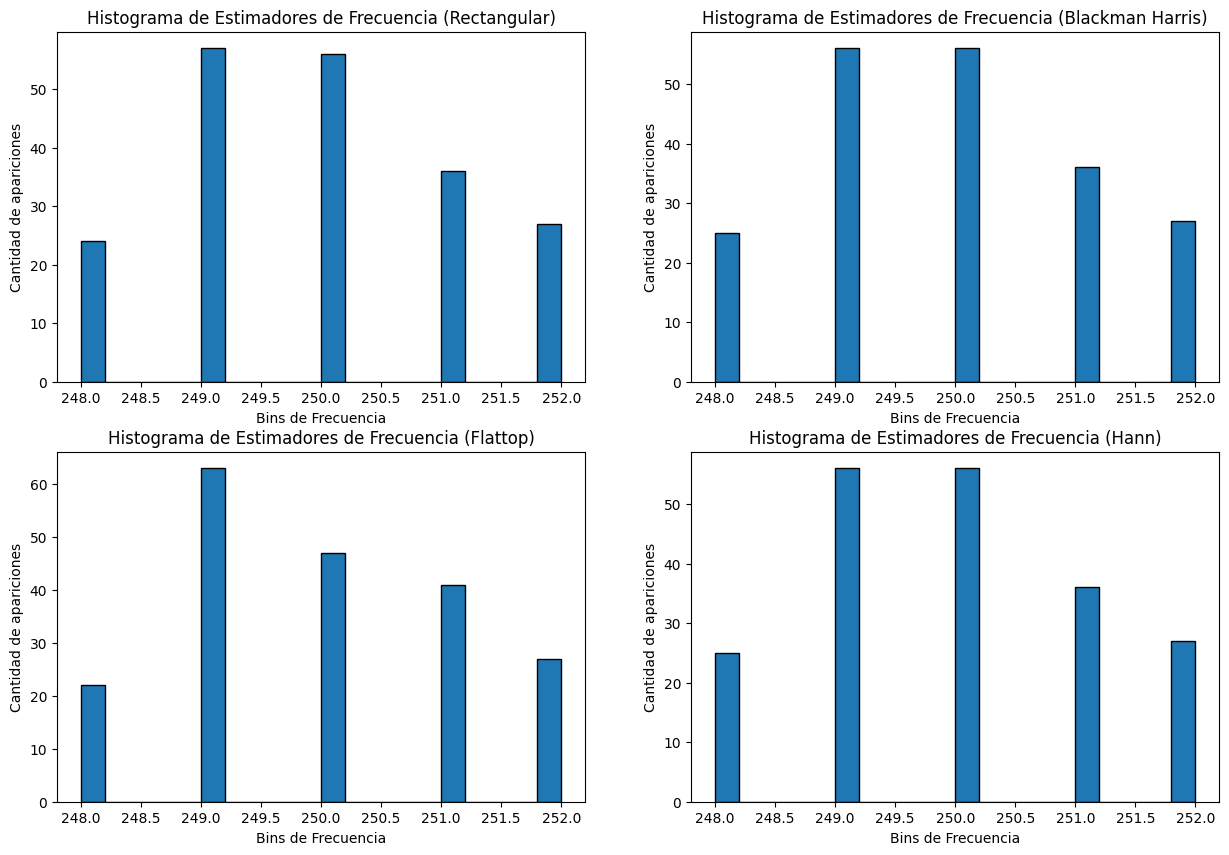

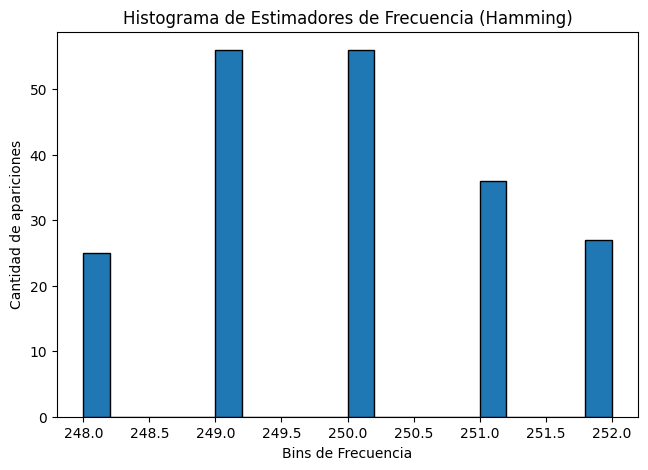

In [12]:
# Gráficos de Histogramas
plt.figure(10, figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(f_rect_10dB, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Rectangular)')
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')

plt.subplot(2,2,2)
plt.hist(f_blck_10dB, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Blackman Harris)')
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')

plt.subplot(2,2,3)
plt.hist(f_flat_10dB, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Flattop)')
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')

plt.subplot(2,2,4)
plt.hist(f_hann_10dB, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Hann)')
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')

plt.show()

plt.figure(11, figsize=(7.5,5))
plt.hist(f_hamming_10dB, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Hamming)')
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')
plt.show()

Podemos observar que los resultados son similares para todas las ventanas. Al incluir un shifter, la frecuencia de cada senoidal es distinta, es por ello que no vemos que todas las frecuencias se concentran en $250 Hz$ como se esperaría cuando no se incluye. 

Los valores hallados se encuentran entre los esperados.

In [13]:
## Sesgo de los estimadores de frecuencia
#hay que restar el valor verdadero de la frecuencia para cada una de las 200 realizaciones

#vector de 200 posiciones con la frecuencia random + la fija para cada posicion
f_real_bins = frec_rand + N/4 #[bins]

## Sesgo mediano de los estimadores de frecuencia
# Calculás la diferencia para cada una de las 200 realizaciones y luego tomás la mediana
#10dB
sesgo_frec_rect_10dB = np.median(f_rect_10dB - f_real_bins)
sesgo_frec_blck_10dB = np.median(f_blck_10dB - f_real_bins)
sesgo_frec_flat_10dB = np.median(f_flat_10dB - f_real_bins)
sesgo_frec_hamming_10dB = np.median(f_hamming_10dB - f_real_bins)
sesgo_frec_hann_10dB = np.median(f_hann_10dB - f_real_bins)

## Varianza de los estimadores de frecuencia
var_frec_rect_10dB = st.median_abs_deviation(f_rect_10dB, center = np.median)
var_frec_blck_10dB = st.median_abs_deviation(f_blck_10dB, center = np.median)
var_frec_hamming_10dB = st.median_abs_deviation(f_hamming_10dB, center = np.median)
var_frec_flat_10dB = st.median_abs_deviation(f_flat_10dB, center = np.median)
var_frec_hann_10dB = st.median_abs_deviation(f_hann_10dB, center = np.median)


#3dB
sesgo_frec_rect_3dB = np.median(f_rect_3dB - f_real_bins)
sesgo_frec_blck_3dB = np.median(f_blck_3dB- f_real_bins)
sesgo_frec_flat_3dB = np.median(f_flat_3dB- f_real_bins)
sesgo_frec_hamming_3dB = np.median(f_hamming_3dB - f_real_bins)
sesgo_frec_hann_3dB = np.median(f_hann_3dB - f_real_bins)

## Varianza de los estimadores de frecuencia
var_frec_rect_3dB = st.median_abs_deviation(f_rect_3dB, center = np.median)
var_frec_blck_3dB = st.median_abs_deviation(f_blck_3dB, center = np.median)
var_frec_hamming_3dB= st.median_abs_deviation(f_hamming_3dB, center = np.median)
var_frec_flat_3dB = st.median_abs_deviation(f_flat_3dB, center = np.median)
var_frec_hann_3dB = st.median_abs_deviation(f_hann_3dB, center = np.median)

In [14]:
estimadores_frec = ["Rectangular", "Blackman", "Flat top", "Hamming", "Hann"]

sesgos_frec_10dB = [sesgo_frec_rect_10dB, sesgo_frec_blck_10dB, sesgo_frec_flat_10dB, sesgo_frec_hamming_10dB, sesgo_frec_hann_10dB]
variancias_frec_10dB = [var_frec_rect_10dB, var_frec_blck_10dB, var_frec_flat_10dB, var_frec_hamming_10dB, var_frec_hann_10dB]

df = pd.DataFrame({
    "Estimador": estimadores_frec,
    "Sesgo de frecuencia": sesgos_frec_10dB,
    "Varianza de frecuencia": variancias_frec_10dB
})

df_styled_10dB = df.style.set_caption("Sesgo y Varianza - Estimadores de Frecuencia - SNR=10dB").hide(axis="index")

sesgos_frec_3dB = [sesgo_frec_rect_3dB, sesgo_frec_blck_3dB, sesgo_frec_flat_3dB, sesgo_frec_hamming_3dB, sesgo_frec_hann_3dB]
variancias_frec_3dB = [var_frec_rect_3dB, var_frec_blck_3dB, var_frec_flat_3dB, var_frec_hamming_3dB, var_frec_hann_3dB]

df = pd.DataFrame({
    "Estimador": estimadores_frec,
    "Sesgo de frecuencia": sesgos_frec_3dB,
    "Varianza de frecuencia": variancias_frec_3dB
})

df_styled_3dB = df.style.set_caption("Sesgo y Varianza - Estimadores de Frecuencia - SNR=3dB").hide(axis="index")



df_styled_10dB

In [15]:
df_styled_3dB

En el caso de los estimadores de frecuencia, se observa que el sesgo aumenta significativamente para el SNR = 3dB en comparación con el SNR = 10dB. 

Esto es coherente, ya que una señal con SNR = 3 dB tiene un nivel de ruido relativamente alto en relación con la señal, lo que afecta directamente la precisión de la estimación de frecuencia

La varianza permanece con un valor constante de 1. Como se está viendo el MAD (*median absolute deviation*) calculado sobre índices de bins enteros, si las estimaciones "caen" mayormente en un bin o su vecino, es esperable observar este resultado.

## **Bonus**
#### ¿Qué sucede con el estimador $\hat{\Omega}_1$ si se realiza zero-padding? 
Al refinar el muestreo en la grilla de frecuencias mediante zero-padding, las señales transformadas se vuelven más suaves (por tener más puntos a los cuales interpolar) y se obtienen más bins de frecuencia que antes. Y al tener más bins, hay más frecuencias donde buscar el valor máximo de la señal. De esta forma, se obtiene que el estimador puede tomar más valores que antes y las frecuencias halladas se asemejan más a las frecuencias reales de las senoidales.

Por otro lado, es de esperarse que los estimadores de amplitud no se vean afectados por el zero-padding, ya que en la frecuencia de $250 Hz$ hay un bin en ambos casos. De esta forma, los histogramas deberían ser idénticos.

Se realizan las cuentas esta vez con zero-padding para SNR = 10dB

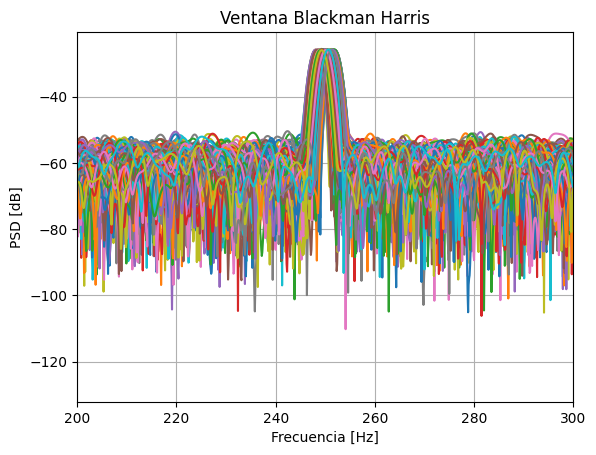

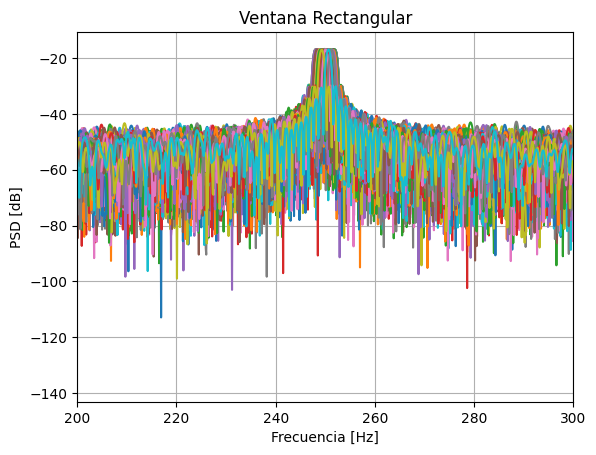

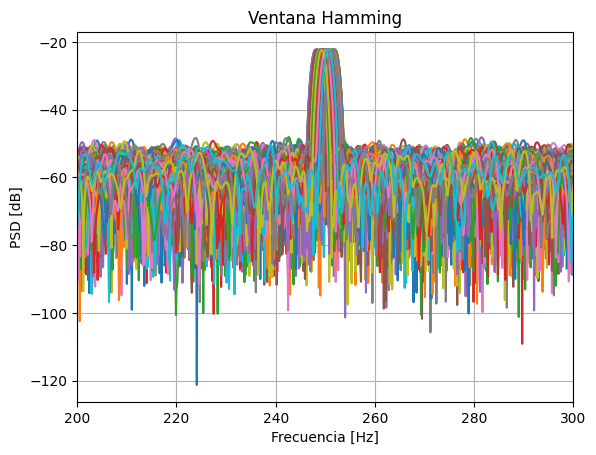

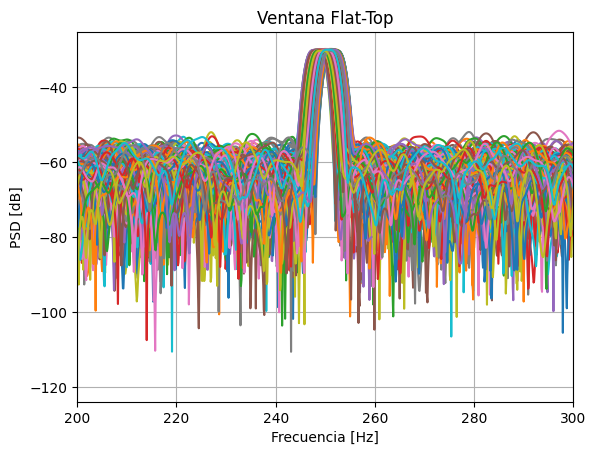

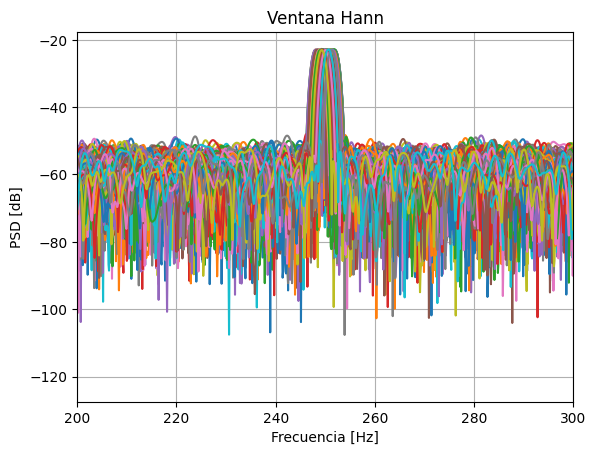

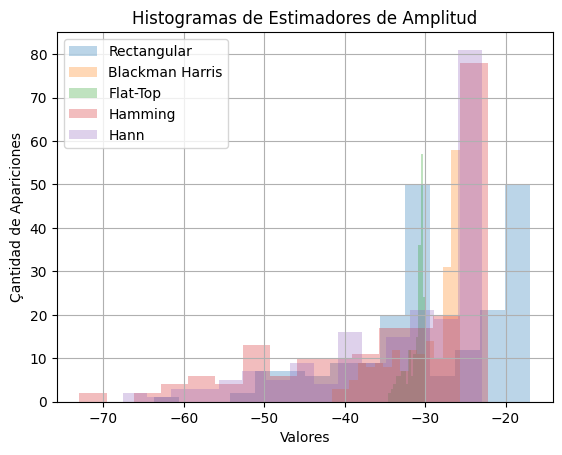

In [16]:
nfft = 10*N

X_MAT_RECT_ZP = fft(xx_mat_rect_10dB, nfft, axis = 0) / nfft #Axis= 0 para que lo haga por columna
bins_zp = np.arange(10*N) * (fs/(N*10))

X_MAT_BLCK_ZP = fft(xx_mat_blck_10dB, nfft, axis = 0) / nfft

X_MAT_FLAT_ZP = fft(xx_mat_flat_10dB, nfft, axis = 0) / nfft 

X_MAT_HAMMING_ZP = fft(xx_mat_hamming_10dB, nfft, axis = 0) / nfft

X_MAT_HANN_ZP = fft(xx_mat_hann_10dB, nfft, axis = 0) / nfft

plt.figure(12)
plt.plot (bins_zp, 10*np.log10((2*np.abs(X_MAT_BLCK_ZP)**2))) 
plt.title('Ventana Blackman Harris')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))
plt.show ()

plt.figure(13)
plt.plot (bins_zp, 10*np.log10((2*np.abs(X_MAT_RECT_ZP)**2))) 
plt.title('Ventana Rectangular')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))
plt.show ()

plt.figure(14)
plt.plot (bins_zp, 10*np.log10((2*np.abs(X_MAT_HAMMING_ZP)**2))) 
plt.title('Ventana Hamming')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))
plt.show ()

plt.figure(15)
plt.plot (bins_zp, 10*np.log10((2*np.abs(X_MAT_FLAT_ZP)**2))) 
plt.title('Ventana Flat-Top')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))
plt.show ()

plt.figure(16)
plt.plot (bins_zp, 10*np.log10((2*np.abs(X_MAT_HANN_ZP)**2))) 
plt.title('Ventana Hann')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid (True)
plt.xlim((fs/5,3*fs/10))
plt.show ()

### Estimadores de amplitud (deberian ser iguales)
aa_rect_zp = 10*np.log10((2*np.abs(X_MAT_RECT_ZP[10*N//4,:])**2)) ## La doble barra me da el numero entero
aa_blck_zp = 10*np.log10((2*np.abs(X_MAT_BLCK_ZP[10*N//4,:])**2))
aa_flat_zp = 10*np.log10((2*np.abs(X_MAT_FLAT_ZP[10*N//4,:])**2))
aa_hamming_zp = 10*np.log10((2*np.abs(X_MAT_HAMMING_ZP[10*N//4,:])**2))
aa_hann_zp = 10*np.log10((2*np.abs(X_MAT_HANN_ZP[10*N//4,:])**2))

plt.figure(17)
plt.hist(aa_rect_zp, bins = 15, alpha = transp, label='Rectangular') #alpha me da la transparencia
plt.hist(aa_blck_zp, bins = 15, alpha = transp, label='Blackman Harris')
plt.hist(aa_flat_zp, bins = 15, alpha = transp, label='Flat-Top')
plt.hist(aa_hamming_zp, bins = 15, alpha = transp, label='Hamming')
plt.hist(aa_hann_zp, bins = 15, alpha = transp, label='Hann')
plt.title('Histogramas de Estimadores de Amplitud')
plt.grid(True)
plt.xlabel('Valores')
plt.ylabel('Çantidad de Apariciones')
plt.legend()
plt.show()

## Estimadores de frecuencia
f_blck_zp = np.argmax(np.abs(X_MAT_BLCK_ZP)[:10*N//2, :], axis=0)/10
f_flat_zp = np.argmax(np.abs(X_MAT_FLAT_ZP)[:10*N//2, :], axis=0)/10
f_rect_zp = np.argmax(np.abs(X_MAT_RECT_ZP)[:10*N//2, :], axis=0)/10
f_hamming_zp = np.argmax(np.abs(X_MAT_HAMMING_ZP)[:10*N//2, :], axis=0)/10
f_hann_zp = np.argmax(np.abs(X_MAT_HANN_ZP)[:10*N//2, :], axis=0)/10

Como era de esperarse, el histograma de los estimadores de amplitud es el mismo para las señales con y sin zero padding.

Por otro lado, se puede observar con mayor suavidad los gráficos de las funciones interpolantes, producto del zero padding. Ya no se observan los picos que anteriormente se visualizaban producto de la interpolación. 

A continuación se grafican los histogramas de los estimadores de frecuencia, que ilustran lo explicado:

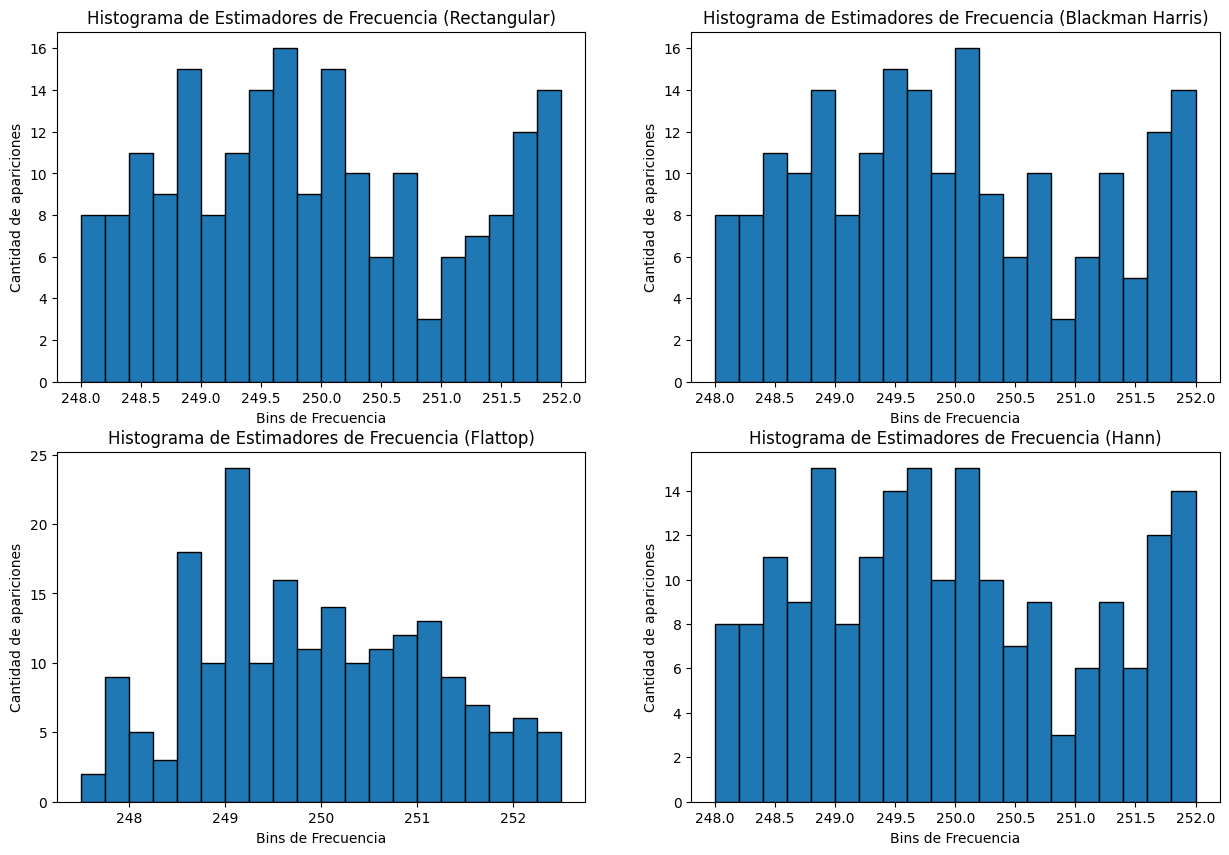

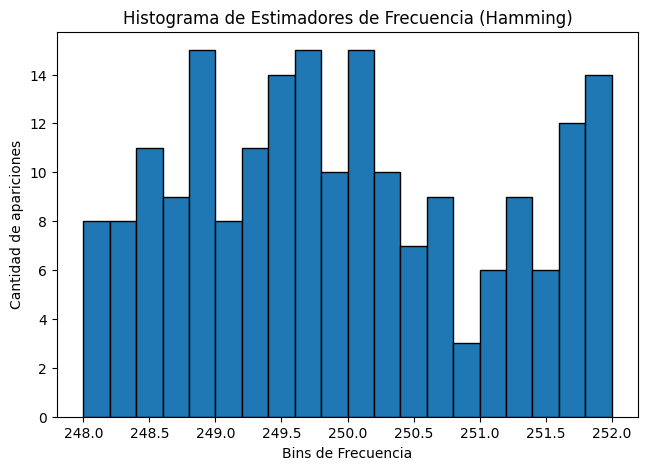

In [19]:
# Gráficos de Histogramas con Zero Padding
plt.figure(18, figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(f_rect_zp, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Rectangular)') #VER, NO SON LOS ESTIMADORES ES HISTOGRAMA DE FRECUENCIAS 
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')

plt.subplot(2,2,2)
plt.hist(f_blck_zp, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Blackman Harris)')
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')

plt.subplot(2,2,3)
plt.hist(f_flat_zp, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Flattop)')
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')

plt.subplot(2,2,4)
plt.hist(f_hann_zp, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Hann)')
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')

plt.show()

plt.figure(19, figsize=(7.5,5))
plt.hist(f_hamming_zp, bins=20, edgecolor='black')
plt.title('Histograma de Estimadores de Frecuencia (Hamming)')
plt.xlabel('Bins de Frecuencia')
plt.ylabel('Cantidad de apariciones')
plt.show()

En los gráficos superiores se observa claramente el efecto descrito anteriomente que resulta consecuencia directa del zero padding. La cantidad de bins de frecuencia aumentó, permitiendo discernir una mayor cantidad de frecuencias diferentes. Si se aumentara el zero padding, las frecuencias se asemejarían aún más a las que fueron utilizadas para la generación de las senoidales.

In [20]:
#vector de 200 posiciones con la frecuencia random + la fija para cada posicion
f_real_bins = frec_rand + N/4 #[bins]

## Sesgo mediano de los estimadores de frecuencia
# Calculás la diferencia para cada una de las 200 realizaciones y luego tomás la mediana
#10dB
sesgo_frec_rect_zp = np.median(f_rect_zp - f_real_bins)
sesgo_frec_blck_zp = np.median(f_blck_zp - f_real_bins)
sesgo_frec_flat_zp = np.median(f_flat_zp - f_real_bins)
sesgo_frec_hamming_zp = np.median(f_hamming_zp - f_real_bins)
sesgo_frec_hann_zp = np.median(f_hann_zp - f_real_bins)

## Varianza de los estimadores de frecuencia
var_frec_rect_zp = st.median_abs_deviation(f_rect_zp, center = np.median)
var_frec_blck_zp = st.median_abs_deviation(f_blck_zp, center = np.median)
var_frec_hamming_zp = st.median_abs_deviation(f_hamming_zp, center = np.median)
var_frec_flat_zp = st.median_abs_deviation(f_flat_zp, center = np.median)
var_frec_hann_zp = st.median_abs_deviation(f_hann_zp, center = np.median)

In [22]:
estimadores_frec = ["Rectangular", "Blackman", "Flat top", "Hamming", "Hann"]

sesgos_frec_zp = [sesgo_frec_rect_zp, sesgo_frec_blck_zp, sesgo_frec_flat_zp, sesgo_frec_hamming_zp, sesgo_frec_hann_zp]
variancias_frec_zp = [var_frec_rect_zp, var_frec_blck_zp, var_frec_flat_zp, var_frec_hamming_zp, var_frec_hann_zp]

df = pd.DataFrame({
    "Estimador": estimadores_frec,
    "Sesgo de frecuencia": sesgos_frec_zp,
    "Varianza de frecuencia": variancias_frec_zp
})

df_styled_zp = df.style.set_caption("Sesgo y Varianza - Estimadores de Frecuencia - Zero Padding - SNR=10dB").hide(axis="index")

df_styled_zp

Tal como era de esperarse, el sesgo se ve disminuído en una gran magnitud cuando se trata de señales con zero padding. Esto sucede debido a que antes las frecuencias solo podian adjudicarse a 5 bins y se aumento a 41 posibles bins entre 248 y 252 Hz. De esta forma el error de los nuevos estimadores pueden ser como máximo de $0.05 Hz$ a diferencia de los anteriores que podian alcanzar un error de $0.5 Hz$, acercandose en gran medida al valor real de las frecuencias reales. 

Por otro lado, es notable una mejoría en la varianza, lo que sigue reforzando que existe una mejoría al aplicar zero padding. 

## **Conclusión**

Se desarrolló un algoritmo para la generación de senoidales con componentes aleatorias, a las cuales se les añadió ruido de acuerdo con dos valores de SNR distintos. Posteriormente, las señales fueron multiplicadas por diferentes ventanas con el fin de analizar su efecto. A partir de las señales ruidosas y ventaneadas, se obtuvieron resultados coherentes con lo esperado para los estimadores de amplitud y frecuencia. Finalmente, en base a dichos resultados, se calcularon el sesgo y la varianza de los estimadores diseñados.

En cuanto al SNR, se logró observar el efecto en el piso de ruido de la señal. Se observaron satisfactoriamente los efectos esperados para un SNR más alto con respecto a uno más bajo en el estimador de frecuencia. Por otro lado, en cuanto a las ventanas, se comprobó que la elección de las mismas influyen directamente en la estimación de la amplitud de las señales. 
 
Por último, se analizaron los efectos del zero padding sobre la resolución espectral en el cálculo de los estimadores de frecuencia. El incremento en la resolución generó una mayor cantidad de bins en los que podía localizarse el valor máximo del espectro. Como consecuencia, los estimadores lograron resultados más próximos a las frecuencias reales de las senoidales originalmente generadas.

Estos resultados evidencian la importancia de la elección de las herramientas en la estimación de amplitud y frecuencia de una señal. 

## **Autoevaluación del Aprendizaje**
**Indicar una opción**:
*Resolví la tarea sin dudas*

**Responder**:

*¿Qué aprendiste al hacer esta tarea? ¿Qué te quedó claro? ¿Qué te sigue costando?*
Aprendimos sobre estimadores, quedándonos claro por qué son necesarios cuando aparecen las variables aleatorias y lo que representan. Asimismo, pudimos comprender la diferencia que implica a nivel espectral aplicar distintas ventanas. 

Indicar si se utilizó IA:

Sí, usamos chatGPT y Gemini para terminar de comprender conceptos teóricos.
